In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.rcParams["figure.figsize"] = (16, 9)
plt.close("all")

In [6]:
bikes = pd.read_csv("../data/bikesharing/data.csv")
bikes["timestamp"] = pd.to_datetime(bikes["timestamp"],  format="%Y-%m-%d %H:%M:%S")
bikes.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


Column description: 

- "timestamp" - timestamp field for grouping the data
- "cnt" - the count of a new bike shares
- "t1" - real temperature in C
- "t2" - temperature in C "feels like"
- "hum" - humidity in percentage
- "windspeed" - wind speed in km/h
- "weathercode" - category of the weather
- "isholiday" - boolean field - 1 holiday / 0 non holiday
- "isweekend" - boolean field - 1 if the day is weekend
- "season" - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

# Exercise 1) Scatter plot

a) create a figure with one axis instance. You can either use plt.figure() or use plt.subplots(). Get comfortable with both methods 

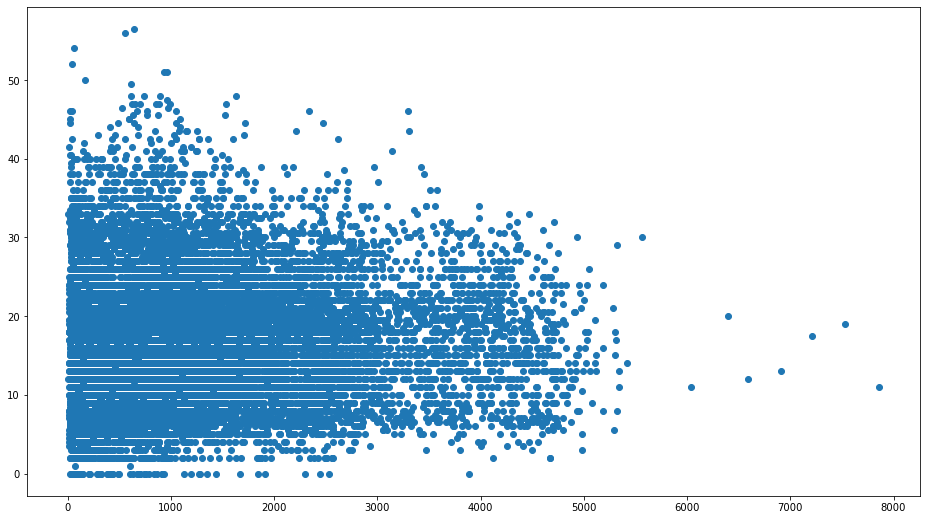

In [7]:
plt.scatter(bikes.cnt,bikes.wind_speed)
plt.show()

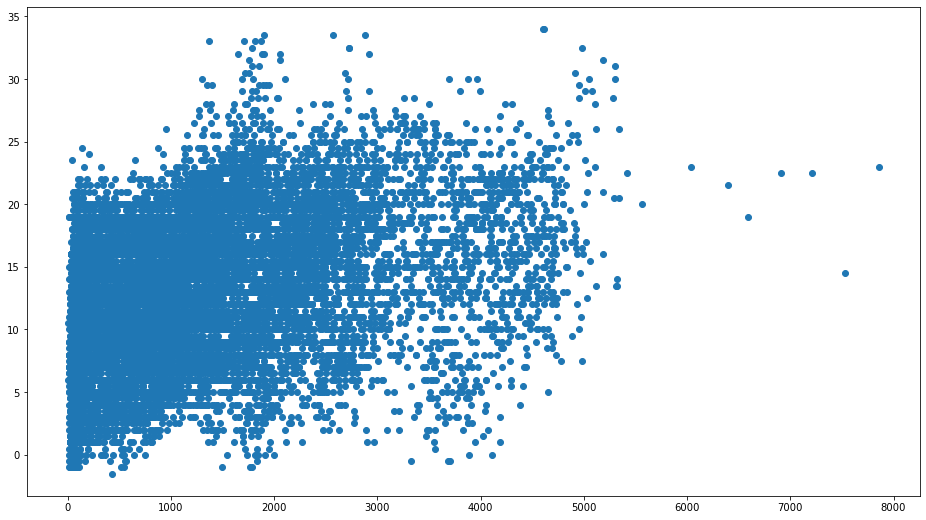

In [14]:
#Solution from Patrick: 
plt.scatter(x = bikes.cnt, y = bikes.t1)

#

In [15]:
#Try testing the

temp = bikes.copy()

temp.quantile = pd.qcut(temp.cnt, q = 10, labels = False)
temp_grouped = temp.groupby(by = bikes.quantile.mean())
plt.scatter(x = temp_grouped.index, y = temp_grouped.t1)

AttributeError: 'function' object has no attribute 'mean'

In [ ]:
#Another approach to make data transparent

In [13]:
import matplotlib.pyplot as plt
import matplotlib.lines as lines

#When you start making a plot, you can start with fig = plt.figure() and add details into the plot, the same to subplot if you want to have more than 2 plots displayed on one page.

fig = plt.figure() 

fig.add_artist(lines.Line2D(bikes.cnt,bikes.wind_speed))

plt.title('Plot between cyclist number and temperature \n', fontsize = 16, fontweight = 'bold')

plt.show()




'''
bikes.cnt
y = bikes.wind_speed

def scatter_plot(x,y, ax, ax_histx, ax_histy):
    ax_histx.tick_params(axis = x, labelbottom = True)
    ax_histy.tick_params(axis = y,  labelleft = True)
    
    ax.scatter(x,y)
    
print(scatter_plot(bikes.cnt,bikes.wind_speed, ax_histx.tick_params(axis
'''

ValueError: Image size of 9054734x36626 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1152x648 with 1 Axes>

'\nbikes.cnt\ny = bikes.wind_speed\n\ndef scatter_plot(x,y, ax, ax_histx, ax_histy):\n    ax_histx.tick_params(axis = x, labelbottom = True)\n    ax_histy.tick_params(axis = y,  labelleft = True)\n    \n    ax.scatter(x,y)\n    \nprint(scatter_plot(bikes.cnt,bikes.wind_speed, ax_histx.tick_params(axis\n'

b) create a scatter plot where you plot the humidity (hum) vs the real temperature (t1) column. HINT: you can show the figure by calling the figure instance at the end of the cell

c) label the x and y axis with their respective names. HINT: use the .set_xlabel(x_name) and .set_ylabel(x_name) label methods

d) give the axis instance a title. HINT: use .set_title(axis_title) 

e) save your figure as a .png file. HINT: have a look at the matplotlib documentation (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html)

# Exercise 2) Line plot

a) use a lineplot to visualize the count of new bike shares (cnt column) before April 2015. HINT: you need to subset the dataframe by using the timestamp column 

b) place a red marker on each point where the respective timestamp belongs to the weekend (is_weekend == 1)
1. identify the rows where is_holiday == 1 (i.e. create a mask)
2. use a scatter plot to visualize the points that are observed on the weekend. HINT: (x=timestamp, y=cnt) and for controlling the marker size and color see (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)

c) what happens if you use .plot(...) instead of .scatter(...) as in b). HINT: recreate the figure that you created in exercise 2a)